## Atmospheric effects on Ground Based Telescope Observing Bands
This notebook uses a python script to calculate and plot CMB instrument sensitivity to fluctuations in atmospheric pwv, given band shapes.

In [142]:
##### import matplotlib.pyplot as plt
#edit
import numpy as np
import matplotlib.scale as scale
import matplotlib.pyplot as plt
import yaml
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

from Atmos_pwv_funcs import *

%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 6]

# am model files for Atacama and Pole
Instead of using CH's datacube with information on tb, tx, and frequency, we can upload our own output txt files directly from the am model.  This way we can refine the number of frequency steps, elevation, and look at Jacobian values for pwv in sites. Where the deg is in AZ not EL

input: am ACT_annual_50.amc 0 GHz 600 GHz 0.1 GHz 40 deg 0.0 >> ACT_annual50_0pwv.txt

output: f GHz  tau neper  tx none  Trj K  Tb K

- SPole- 425.426 um pwv at 50% --> tropscale= 0.705 for 300 um, 0.941 for 400 um
- Atacama- 931.525 um pwv at 50% --> tropscale= 0.966 for 900 um, 1.07 for 1000 um

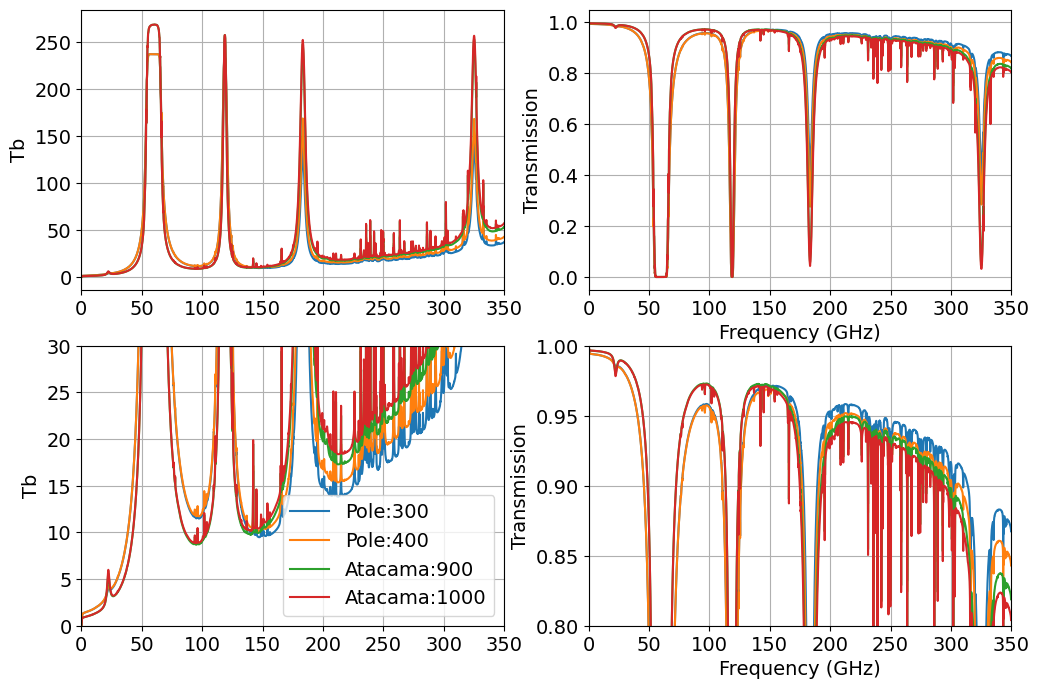

In [2]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]

# Read in atmospheric data, plot it to see that it makes sense.
atmos = {}
read_atmospheres(atmos)

numax = 350
plt.subplot(2,2,1)
for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][4])
plt.ylabel('Tb')
plt.xlim(0,numax)
plt.grid()

plt.subplot(2,2,2)
for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][2])
plt.ylabel('Transmission')
plt.xlabel('Frequency (GHz)')
plt.xlim(0,numax)
plt.grid()

plt.subplot(2,2,3)
for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        pltlabel=site+':'+str(pwv)
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][4],label=pltlabel)
plt.legend()
plt.ylabel('Tb')
plt.xlim(0,numax)
plt.ylim(0,30)
plt.grid()

plt.subplot(2,2,4)
for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][2])
plt.ylabel('Transmission')
plt.xlabel('Frequency (GHz)')
plt.xlim(0,numax)
plt.ylim(0.8,1.0)
plt.grid()



# Plot delta_Tb / delta_pwv


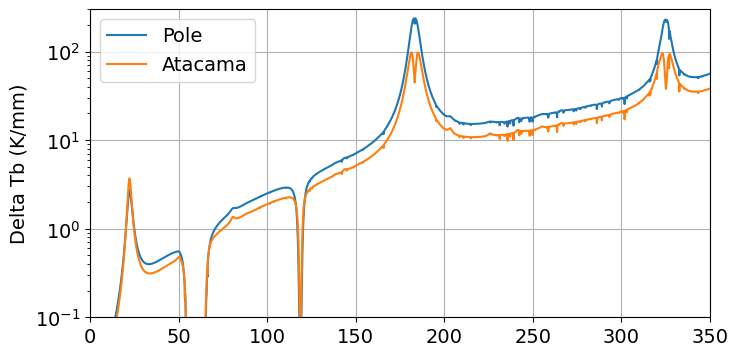

In [3]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [8, 4]

# plot Tb differences between pwvs, which are 0.1mm pwv apart.
dpwv = 0.1 #mm
nuvec = atmos['Pole'][400][0]
Tbdiff_pole = (atmos['Pole'][400][4]-atmos['Pole'][300][4])/dpwv  #K/mm
Tbdiff_atacama = (atmos['Atacama'][1000][4]-atmos['Atacama'][900][4])/dpwv  #K/mm

plt.semilogy(nuvec,Tbdiff_pole,label='Pole')
plt.semilogy(nuvec,Tbdiff_atacama,label='Atacama')
plt.ylabel('Delta Tb (K/mm)')
plt.legend()
plt.xlim(0,350)
plt.ylim(0.1,300)
plt.grid()


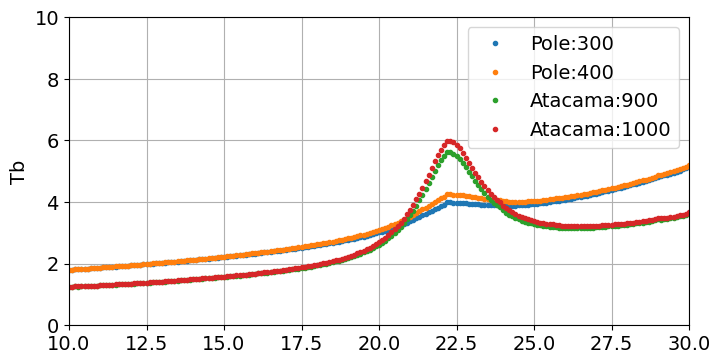

In [4]:
# Look at 22GHz water line more closely.
# Shape of Pole line is weird, maybe suspicious.  Should verify with direct am runs with
# better frequency resolution.

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [8, 4]

numax = 30

for site in ['Pole','Atacama']:
    for pwv in atmos[site].keys():
        pltlabel=site+':'+str(pwv)
        plt.plot(atmos[site][pwv][0],atmos[site][pwv][4],'.',label=pltlabel)
plt.legend()
plt.ylabel('Tb')
#plt.xlim(10,numax)
plt.xlim(10,30)
plt.ylim(0,10)
plt.grid()


## Jacobian wrt Trj plots
Read in --wjacobian.txt file in func.py 

In [5]:
''' this will be necessary when the Jacobian is incorporated
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 6]

figure.set_constrained_layout_pads(w_pad=5 / 72, h_pad=2 / 72, hspace=0.5,
                                wspace=1.0)

plt.subplot(2,3,1)
plt.plot(Atacama[0], Atacama[1]) #tau neper

plt.subplot(2,3,2)
plt.plot(Atacama[0], Atacama[2]) #transmittance

plt.subplot(2,3,3)
plt.plot(Atacama[0], Atacama[3]) #trj K

plt.subplot(2,3,4)
plt.plot(Atacama[0], Atacama[4]) #tb K

plt.subplot(2,3,5)
plt.plot(Atacama[0], Atacama[5]) #? Jacobian of Trj
'''

" this will be necessary when the Jacobian is incorporated\nplt.rcParams.update({'font.size': 14})\nplt.rcParams['figure.figsize'] = [12, 6]\n\nfigure.set_constrained_layout_pads(w_pad=5 / 72, h_pad=2 / 72, hspace=0.5,\n                                wspace=1.0)\n\nplt.subplot(2,3,1)\nplt.plot(Atacama[0], Atacama[1]) #tau neper\n\nplt.subplot(2,3,2)\nplt.plot(Atacama[0], Atacama[2]) #transmittance\n\nplt.subplot(2,3,3)\nplt.plot(Atacama[0], Atacama[3]) #trj K\n\nplt.subplot(2,3,4)\nplt.plot(Atacama[0], Atacama[4]) #tb K\n\nplt.subplot(2,3,5)\nplt.plot(Atacama[0], Atacama[5]) #? Jacobian of Trj\n"

# Calculate g_pwv = delta_Tb/delta_pwv for a specified instrument band.

1. Define a single-moded detector's instrument band response:
  - F_inst($\nu$) = F_detector($\nu$) \* F_optics($\nu$)
  
  - The frequency-dependent factors F_detector and F_optics are numpy arrays.  They can come from:
    - a file
    - a flat band definition
    - a logistic band defition 
    - a power law "$\nu^\alpha$" model.  We note that an overilluminated Lyot stop gives alpha=2.
  
  
2. Find dPoptical_atmosphere/dpwv by appropriately integrating B_atmos($\nu$, T_b_atmos)*F_inst($\nu$).


3. Find dPoptical_dT_cmb using
  - F_tot($\nu$) = F_inst($\nu$) * F_atmos($\nu$)
  - Appropriately ntegrate delta_T_cmb * F_tot($\nu$) 
  
   
4. Take the ratio of those two, g_pwv = (dPopt_atmosphere/dpwv)/(dPopt_cmb/dT_cmb) = dT_cmb/dpwv .
  - Note that any overall factor in instrument efficiency common to the two factors will cancel in this ratio.  Thus, we don't worry about the overall normalization of the detector or optics efficiency, or whether we're using a single polarization or unpolarized detector.

# Example calculation of g_pwv 
For several related band models near 90GHz:
- a flat detector band, 
- a similar logistic band,
- a flat detector band times an optics alpha model

Site =  Pole
Band:  nu_low = 130.0, nu_high = 170.0
Bandmodel        dPdpwv      dPdTcmb       gpwv
Flat             8.541e-12   6.083e-13     14.042
Logistic:        9.073e-12   6.068e-13     14.952
Flat*alpha:      9.065e-12   6.047e-13     14.991


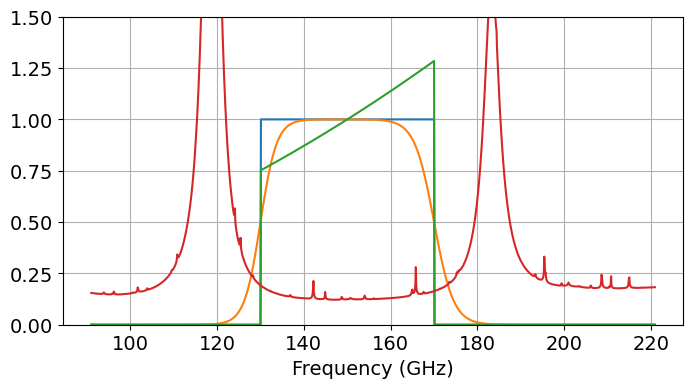

In [6]:
nu_lowedge = 130 # GHz
nu_highedge =170 
nu_center = (nu_lowedge+nu_highedge)/2
dnu = nu_highedge - nu_lowedge

# Integration frequency vector
nu_ghz = np.arange(nu_lowedge*0.7,nu_highedge*1.3,0.1) # full frequency vector over which to integrate.

# Choose site, and therefore the atmosphere
site = 'Pole'
pwv1 = list(atmos[site].keys())[0]  # assume we've got two pwv's loaded in!
pwv2 = list(atmos[site].keys())[1]
nu_atmos = atmos[site][pwv1][0]
Tb1 = atmos[site][pwv1][4]
Tb2 = atmos[site][pwv2][4]
atmos_trans = (atmos[site][pwv2][2]+atmos[site][pwv1][2])/2
dpwv = 0.1 #mm
# Interpolate Tb's to nu_ghz frequency points
Tb1_i = np.interp(nu_ghz,nu_atmos,Tb1)
Tb2_i = np.interp(nu_ghz,nu_atmos,Tb2)
atmos_trans_i = np.interp(nu_ghz,nu_atmos,atmos_trans)

print('Site = ',site)
print('Band:  nu_low = {0:4.1f}, nu_high = {1:4.1f}'.format(nu_lowedge, nu_highedge))
print('Bandmodel        dPdpwv      dPdTcmb       gpwv')

#flat band calculation
flat_band = flat_bandmodel(nu_ghz,nu_lowedge,nu_highedge)
dPdpwv = calc_dPdpwv(nu_ghz, Tb1_i, Tb2_i, dpwv, flat_band)
dPdTcmb = calc_dPdTcmb(nu_ghz, flat_band, atmos_trans_i)
gpwv= calc_gpwv(dPdpwv, dPdTcmb)
print('Flat             {0:4.3e}   {1:4.3e}     {2:4.3f}'.format(dPdpwv, dPdTcmb, gpwv))

#logistic band calculation
logistic_band = logistic_bandmodel(nu_ghz, nu_center, dnu, 2.0, 0.7)
dPdpwv = calc_dPdpwv(nu_ghz, Tb1_i, Tb2_i, dpwv, logistic_band)
dPdTcmb = calc_dPdTcmb(nu_ghz, logistic_band, atmos_trans_i)
gpwv= calc_gpwv(dPdpwv, dPdTcmb)
print('Logistic:        {0:4.3e}   {1:4.3e}     {2:4.3f}'.format(dPdpwv, dPdTcmb, gpwv))


#flat*alpha band calculation
alpha = 2
alpha_band = alpha_bandmodel(nu_ghz,nu_center,alpha)
total_band = alpha_band*flat_band
dPdpwv = calc_dPdpwv(nu_ghz, Tb1_i, Tb2_i, dpwv, total_band)
dPdTcmb = calc_dPdTcmb(nu_ghz, total_band, atmos_trans_i)
gpwv= calc_gpwv(dPdpwv, dPdTcmb)
print('Flat*alpha:      {0:4.3e}   {1:4.3e}     {2:4.3f}'.format(dPdpwv, dPdTcmb, gpwv))

# plot some things
plt.plot(nu_ghz,flat_band)
plt.plot(nu_ghz,logistic_band)
plt.plot(nu_ghz,total_band)
plt.plot(nu_ghz,3*Tb1_i/np.max(Tb1_i))
plt.ylim(0,1.5)
plt.xlabel('Frequency (GHz)')
plt.grid()


# Run a wide range of frequency centers and fractional bandwidths
This will give a global view of where bands should be placed, by this metric.

In [195]:
ncbins = 300 #20
nwbins = 100

# Choose site, and therefore the atmosphere
site = 'Pole'
pwv1 = list(atmos[site].keys())[0]  # assume we've got two pwv's loaded in!
pwv2 = list(atmos[site].keys())[1]
nu_atmos = atmos[site][pwv1][0]
Tb1 = atmos[site][pwv1][4]
Tb2 = atmos[site][pwv2][4]
atmos_trans = (atmos[site][pwv2][2]+atmos[site][pwv1][2])/2
dpwv = 0.1 #mm

# choose x-axis, center frequencies to do this over
flow=60
fhigh=120
band_center_vec = np.linspace(flow,fhigh,ncbins) #centerfreq log space
frac_bandwidth_vec = np.linspace(0.01,0.5,nwbins) #0.1, 0.4, 

# Set up 2D arrays for plotting
out_center= np.empty((ncbins,nwbins))
out_fwidth= np.empty((ncbins,nwbins))
out_highedge = np.empty((ncbins,nwbins))
out_lowedge = np.empty((ncbins,nwbins))
out_gpwv= np.empty((ncbins,nwbins))
out_dPdTcmb= np.empty((ncbins,nwbins))
out_dPdpwv= np.empty((ncbins,nwbins))

cc = 0 # center index
for center in band_center_vec:
    ww = 0  # width index
    for fwidth in frac_bandwidth_vec:
        # Set up frequency vector and associated band definition quantities
        nu_lowedge =  center*(1 - fwidth/2)  # these are edges of band;  integration extends beyond them.
        nu_highedge = center*(1 + fwidth/2)
        nu_center = (nu_lowedge+nu_highedge)/2
        delta_nu = nu_highedge - nu_lowedge 
        nu_low = 0.7*nu_lowedge
        nu_high = 1.3*nu_highedge
        nu_ghz = np.linspace(nu_low,nu_high, 1000)  # full integration band, make it 1000pts.

        # Interpolate Tb's to nu_ghz frequency points
        Tb1_i = np.interp(nu_ghz,nu_atmos,Tb1)
        Tb2_i = np.interp(nu_ghz,nu_atmos,Tb2)
        atmos_trans_i = np.interp(nu_ghz,nu_atmos,atmos_trans)
        out_center[cc][ww] = center
        out_fwidth[cc][ww] = fwidth
        out_lowedge[cc][ww] = nu_lowedge
        out_highedge[cc][ww] = nu_highedge
        
        
        flat_band = flat_bandmodel(nu_ghz,nu_lowedge,nu_highedge)
        logistic_band = logistic_bandmodel(nu_ghz, nu_center, delta_nu, 2.0, 0.7)
        #alpha_band = alpha_bandmodel(nu_ghz,nu_center,alpha)
        # Choose one of the above, here.
        total_band = flat_band

        dPdpwv = calc_dPdpwv(nu_ghz, Tb1_i, Tb2_i, dpwv, total_band)
        dPdTcmb = calc_dPdTcmb(nu_ghz, total_band, atmos_trans_i)
        gpwv= dPdpwv/dPdTcmb
        #gpwv= dPdpwv/dPdTcmb
        
        out_dPdpwv[cc][ww]=dPdpwv
        out_dPdTcmb[cc][ww]=dPdTcmb
        out_gpwv[cc][ww] = calc_gpwv(dPdpwv, dPdTcmb)
        ww += 1
    cc += 1

Text(0.5, 0.98, 'g_pwv (K_cmb/mm)')

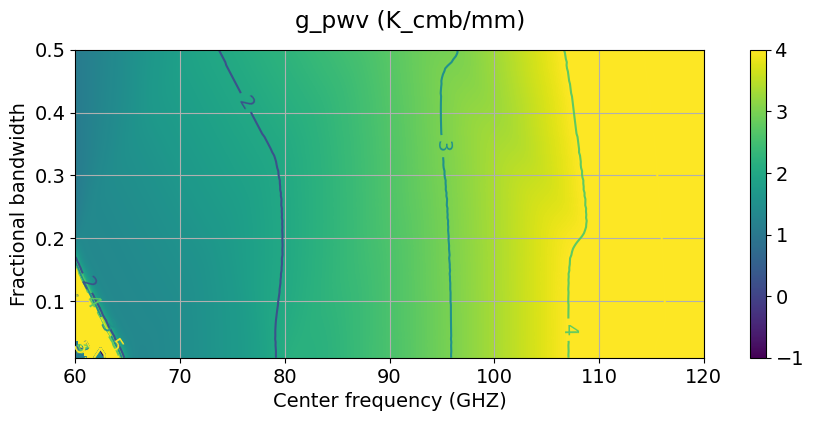

In [196]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 4]
min_c = band_center_vec[0]
max_c = band_center_vec[-1]
min_w = frac_bandwidth_vec[0]
max_w = frac_bandwidth_vec[-1]

fig,ax1 = plt.subplots(1,1)
data = np.abs(out_gpwv.T)
panel = ax1.imshow(data, origin='lower',vmin = -1,vmax=4,interpolation='bilinear',extent=(min_c, max_c, min_w, max_w))
fig.colorbar(panel, ax=ax1)
cset = ax1.contour(band_center_vec,frac_bandwidth_vec,data,levels=[1,2,3,4,5]) #,levels,colors='w')
ax1.clabel(cset)
aspect_factor = (fhigh-flow)
ax1.set_aspect(aspect_factor)
ax1.set_xlabel('Center frequency (GHZ)')
ax1.set_ylabel('Fractional bandwidth')
ax1.grid()
fig.suptitle('g_pwv (K_cmb/mm)')

It would be nice to make the plot above with log frequency on the x-axis, but that requires some fancy axis-labeling.


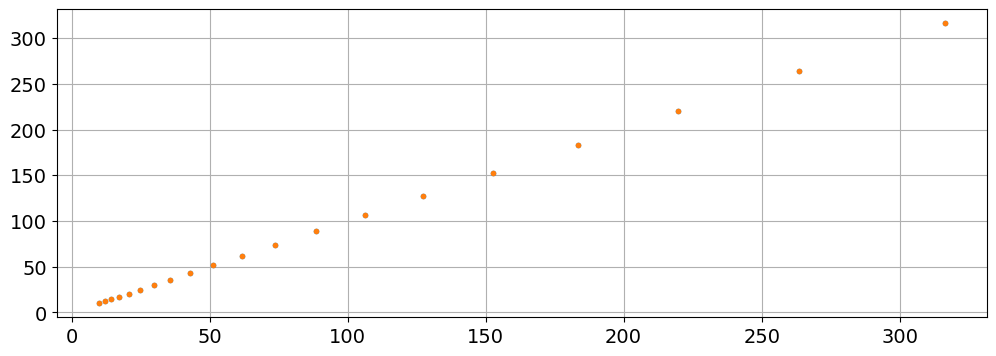

In [121]:
plt.plot(band_center_vec,out_center.T[10,:],'.')
plt.plot(band_center_vec,out_center.T[90,:],'.')
plt.grid()

# Read in band information from a yaml file
(using same dictionary format as jbolo, for compatibility)

In [ ]:
sim = yaml.safe_load(open('channels.yaml'))

In [ ]:
sim['channels']

In [ ]:
#test run to see band shape with logistic model
# Create our own frequency vector, over which we'll integrate.
# Make the logistic band model directly on that vector.
# Interpolate the atmospheric Tb's to that vector.

nuvec = np.arange(10,40,0.1) # frequency vector, interpolate atmos to this.
dnu= sim['channels']['LF_1']['nu_high']-sim['channels']['LF_1']['nu_low']
bandcenter = sim['channels']['LF_1']['band_center']
bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, 2.0, 0.7)
nu_atmos = atmos['Pole'][300][0]
Tb_atmos = atmos['Pole'][300][4]
Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos)

plt.plot(nuvec,bandmodel)
plt.plot(nuvec,Tb_interp/np.max(Tb_interp),'--')
plt.xlim(0,50)
plt.grid()
plt.title('Model 1: Logistic LF1 Band')

Comment on plot above:

- we might want to make band smaller for LF so we are not integrating over the whole thing (all freq)

# This is where we begin Testing and Incorporating our Python Functions
We first want to define what our model is similar to above, from there we can run the other functions to get specfic values, then we can put them all into a dictionary so we can call them later for plotting.

In [ ]:
#This cell defines intial parameters for our instrument band model and atmospheric transmission
#we will be using the new am files for this section, but you can also use CH's data cube or other files

bandcenter = sim['channels']['LF_1']['band_center']
nulow=sim['channels']['LF_1']['nu_low']*0.7
nuhigh=sim['channels']['LF_1']['nu_high']*1.3
nuvec = np.arange(nulow, nuhigh, 0.1) # frequency vector, interpolate atmos to this.
dnu= sim['channels']['LF_1']['nu_high']-sim['channels']['LF_1']['nu_low']
#bandcenter = sim['channels']['LF_2']['band_center']
nu_atmos = atmos['Pole'][300][0]
atmos_trans = atmos['Pole'][300][2]
atmos_trans_interp = np.interp(nuvec,nu_atmos,atmos_trans)
Tb_atmos1 = atmos['Pole'][300][4]
Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos1)
Tb_atmos2 = atmos['Pole'][400][4]
Tb_interp2= np.interp(nuvec,nu_atmos,Tb_atmos2)

dpwv = 0.1 # mm

a=2
n=0.7
alpha= 2 # 0 or 2

In [ ]:
bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)*alpha_bandmodel(nuvec, bandcenter, alpha)#*atmos_trans
#print(len(bandmodel))
#print(len(atmos_trans_interp))

In [ ]:
#this is the instrument and optics band model 
plt.plot(nuvec, bandmodel)
plt.xlabel('Freq (GHz)')
plt.title('Band Model 2: Logistic+Optics for LF1')#+ ch)

In [ ]:
dpdtcmb= calc_dPdTcmb(nuvec, bandmodel, atmos_trans_interp)
print('dPdTcmb:', dpdtcmb)

In [ ]:
dPdpwv= calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, bandmodel)
print('dPdpwv:', dPdpwv)

In [ ]:
gpwv= calc_gpwv(dPdpwv, dpdtcmb)
print('gpwv:', gpwv)

These are previous gpwv results for Pole at 300 and 400 um pwv:

1.122368744313282, 1.1707764662372104
<br>1.109273860925371, 1.157481276402308
<br>0.43580808244702285, 0.4563716164235642
<br>2.4419921980252965, 2.556993622960584
<br>12.825834088708984, 13.350005243407248
<br>54.11917318835391, 56.17281294172888
<br>166.1904136365731, 170.3894376628703

dPdTcmb:
<br>1.3661235964755087e-13 1.3661235964755087e-13
<br>2.306039014463887e-13 2.306039014463887e-13
<br>4.642291404321928e-13 4.642291404321928e-13
<br>6.445851145073793e-13 6.445851145073793e-13
<br>6.533097901070082e-13 6.533097901070082e-13
<br>4.839831617855115e-13 4.839831617855115e-13
<br>2.69708647175781e-13 2.69708647175781e-13

dPdpwv:
<br>1.5332944255529613e-13 1.5994253567248648e-13
<br>2.558028801018893e-13 2.66919698189518e-13
<br>2.0231481150778365e-13 2.1186100320996165e-13
<br>1.5740718205902628e-12 1.6482000272506868e-12
<br>8.379242976441777e-12 8.721689123497848e-12
<br>2.6192768552917207e-11 2.718669561392404e-11
<br>4.48229916355036e-11 4.595550472509482e-11

Given the results, the functions seem to be working well. Have @John check to make sure fxns are all correct.

In [ ]:
#this section visualizes the alpha bandmodel function, play with the alpha parameter (0 or 2)

nughz = np.linspace(10,300,100)
nu0 = 100 # GHz.
alpha = 2

band=alpha_bandmodel(nughz,nu0, 2)
plt.loglog(nughz,band)
plt.grid()

# Calculate and save gpwv values through all bands 
The following cells take portion of previous nbs and calculate gpwv values for each band and then save them into a dictionary where they can be called to plot.

In [ ]:
#South Pole Dict, run once
a = 2.0
n = 0.7
alpha= 2  #can be 0 or 2

chlist = list(sim['channels'].keys())
spole_dict={}
spole_pwvs=[300]#, 400]
dpwv = 0.1 # mm
#for site in ['Pole','Atacama']:
for pwv in spole_pwvs:
    spole_dict[pwv]={}
    for ch in chlist:
        spole_dict[pwv][ch]={}
        bandcenter = sim['channels'][ch]['band_center']
        nu_atmos = atmos['Pole'][pwv][0]
        nulow=sim['channels'][ch]['nu_low']
        nuhigh= sim['channels'][ch]['nu_high']
        dnu= nuhigh-nulow
        nuvec = np.arange(nulow*0.7,nuhigh*1.3,0.1)
        atmos_trans = atmos['Pole'][pwv][2]
        atmos_trans_interp = np.interp(nuvec,nu_atmos,atmos_trans)
        Tb_atmos1 = atmos['Pole'][pwv][4]
        Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos1)
        Tb_atmos2 = atmos['Pole'][pwv+100][4]
        Tb_interp2= np.interp(nuvec,nu_atmos,Tb_atmos2)
        bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)*alpha_bandmodel(nuvec, bandcenter, alpha)
        #pwv2= pwv+100
        dPdpwv = calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, bandmodel)
        dPdTcmb = calc_dPdTcmb(nuvec, bandmodel, atmos_trans_interp)
        gpwv= dPdpwv/dPdTcmb
        
    
        spole_dict[pwv][ch]['freqvec']= nuvec
        spole_dict[pwv][ch]['tbvec']= Tb_interp
        spole_dict[pwv][ch]['high_edge_0']= nuhigh
        spole_dict[pwv][ch]['low_edge_0']= nulow
        spole_dict[pwv][ch]['bandshape']= bandmodel#*atmos_trans_interp
        spole_dict[pwv][ch]['nu0']= bandcenter
        spole_dict[pwv][ch]['dPdTcmb']= dPdTcmb
        spole_dict[pwv][ch]['dPdpwv']= dPdpwv
        spole_dict[pwv][ch]['gpwv']= (dPdpwv/dPdTcmb)

In [ ]:
for ch in chlist:
    print(spole_dict[300][ch]['gpwv'])
    #print(len(spole_dict[300][ch]['bandshape']))

These numbers match well with previous dict numbers.

In [ ]:
#Atacama dict, run once
a = 2.0
n = 0.7
alpha = 2  #can be 0 or 2

chlist = list(sim['channels'].keys())
atacama_dict={}
atacama_pwvs=[900] #1000
dpwv = 0.1

for pwv in atacama_pwvs: #can always add more pwv files and change functions below for pwv
    atacama_dict[pwv]={}
    for ch in chlist:
        atacama_dict[pwv][ch]={}
        bandcenter = sim['channels'][ch]['band_center']
        nu_atmos = atmos['Atacama'][pwv][0]
        nulow=sim['channels'][ch]['nu_low']
        nuhigh= sim['channels'][ch]['nu_high']
        dnu= nuhigh-nulow
        nuvec = np.arange(nulow*0.7,nuhigh*1.3,0.1) 
        atmos_trans = atmos['Atacama'][pwv][2]
        atmos_trans_interp = np.interp(nuvec,nu_atmos,atmos_trans)
        Tb_atmos1 = atmos['Atacama'][pwv][4]
        Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos1)
        Tb_atmos2 = atmos['Atacama'][pwv+100][4]
        Tb_interp2= np.interp(nuvec,nu_atmos,Tb_atmos2)
        bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)*alpha_bandmodel(nuvec, bandcenter, alpha)
        dPdpwv = calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, bandmodel)
        dPdTcmb = calc_dPdTcmb(nuvec, bandmodel, atmos_trans_interp)
        gpwv= dPdpwv/dPdTcmb


        atacama_dict[pwv][ch]['freqvec']= nuvec
        atacama_dict[pwv][ch]['tbvec']= Tb_interp
        atacama_dict[pwv][ch]['high_edge_0']= nuhigh
        atacama_dict[pwv][ch]['low_edge_0']= nulow
        atacama_dict[pwv][ch]['bandshape']= bandmodel#*atmos_trans_interp
        atacama_dict[pwv][ch]['nu0']= bandcenter
        atacama_dict[pwv][ch]['dPdTcmb']= dPdTcmb
        atacama_dict[pwv][ch]['dPdpwv']= dPdpwv
        atacama_dict[pwv][ch]['gpwv']= (dPdpwv/dPdTcmb)

In [ ]:
for ch in chlist:
    print(atacama_dict[900][ch]['gpwv'])
    #print(len(spole_dict[300][ch]['bandshape']))

Previous Atacama gpwv dict results:
<br> 1.40016446096226 1.39929244108557
<br> 1.3031377611569213 1.30269499706147
<br> 0.36135153019617233 0.36274598973346694
<br> 1.94921215916745 1.9574752703150706
<br> 10.068814008570262 10.057970033062979
<br> 42.777747997802265 42.669275098035016
<br> 136.2759078220992 134.16166983811976

## Next Steps: Plotting and Data Visualization

In [ ]:
bandtype_dict= {'ULF':'red', 'LF_1': 'blue', 'LF_2': 'green', 'MF_1': 'pink', 'MF_2': 'orange', 'HF_1': 'purple', 'HF_2': 'grey'}
bandarray=list(bandtype_dict.keys())

#for band in bands['SAT'].keys():
    
for ch in chlist:   
    btype=bandtype_dict[ch]
    x1=spole_dict[300][ch]['high_edge_0']
    x2=spole_dict[300][ch]['low_edge_0']
    plt.axvline(x = x1, color=btype, linestyle='dashed', markersize= 0.5)#, label = 'upper band edge')
    plt.axvline(x = x2, color=btype, linestyle='dashed', markersize= 0.5)
        #plt.fill_between(x1, x2, color='blue', alpha=.2)
    plt.axvspan(x1, x2, alpha=0.2, color=btype) 
    
    plt.semilogx(spole_dict[300][ch]['freqvec'], spole_dict[300][ch]['bandshape'], color=btype, label='Logistic Band Model')
    plt.semilogx(spole_dict[300][ch]['freqvec'], spole_dict[300][ch]['tbvec']/50, color='maroon', linestyle='solid', markersize= 0.15)
#note that model 1 includes optics/lyot info and instrumentation info
plt.xlim(10, 300)
plt.ylim(0, 1.3)
plt.grid()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Normalized Tb (K)')
plt.title('Pole: All Bands')

In [ ]:
bandtype_dict= {'ULF':'red', 'LF_1': 'blue', 'LF_2': 'green', 'MF_1': 'pink', 'MF_2': 'orange', 'HF_1': 'purple', 'HF_2': 'grey'}
bandarray=list(bandtype_dict.keys())

#for band in bands['SAT'].keys():
    
for ch in chlist:   
    btype=bandtype_dict[ch]
    x1=atacama_dict[900][ch]['high_edge_0']
    x2=atacama_dict[900][ch]['low_edge_0']
    plt.axvline(x = x1, color=btype, linestyle='dashed', markersize= 0.5)#, label = 'upper band edge')
    plt.axvline(x = x2, color=btype, linestyle='dashed', markersize= 0.5)
        #plt.fill_between(x1, x2, color='blue', alpha=.2)
    plt.axvspan(x1, x2, alpha=0.2, color=btype) 
    
    plt.semilogx(atacama_dict[900][ch]['freqvec'], atacama_dict[900][ch]['bandshape'], color=btype, label='Logistic Band Model')
    plt.semilogx(atacama_dict[900][ch]['freqvec'], atacama_dict[900][ch]['tbvec']/50, color='maroon', linestyle='solid', markersize= 0.15)
#note that model 1 includes optics/lyot info and instrumentation info
plt.xlim(10, 350)
plt.ylim(0, 1.3)
plt.grid()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Normalized Tb (K)')
plt.title('Atacama: All Bands')


## Edge Placement with new Functions
The cells below display results from two edge functions one high and one low. It allows us to look at the edges of our observing bands, similar to previous functions above, but we add in high/low band edges and remove the center frequency.

By properly using these functions we can adjust the dictionaries above for the two sites with not only gpwv values but also the gpwv values as a function of high and low edges.

In [ ]:
#this function returns 2 arrays
#dPdTcmb_l, dPdpwv_l = calc_lowedgevalues(sim['channels']['LF_1']['nu_low'], sim['channels']['LF_1']['nu_high'], atmos['Pole'][300][0], atmos['Pole'][400][0], atmos['Pole'][300][1], atmos['Pole'][400][1], dnu, 2, 0.7, 2)
#gpwv_l=dPdpwv_l/dPdTcmb_l
#print(gpwv_l)

## Two New Dictionaries
One dict for Pole and one dict for Atacama.  These hold all the information needed for gpwv values and edges.

In [ ]:
#South Pole Dict, run once
a = 2.0
n = 0.7
alpha= 2  #can be 0 or 2

chlist = list(sim['channels'].keys())
spole_dict={}
spole_pwvs=[300]#, 400]
#for site in ['Pole','Atacama']:
for pwv in spole_pwvs:
    spole_dict[pwv]={}
    for ch in chlist:
        spole_dict[pwv][ch]={}
        bandcenter = sim['channels'][ch]['band_center']
        nu_atmos = atmos['Pole'][pwv][0]
        nulow=sim['channels'][ch]['nu_low']
        nuhigh= sim['channels'][ch]['nu_high']
        dnu= nuhigh-nulow
        nuvec = np.arange(nulow*0.7,nuhigh*1.3,0.1)
        atmos_trans = atmos['Pole'][pwv][2]
        atmos_trans_interp = np.interp(nuvec,nu_atmos,atmos_trans)
        Tb_atmos1 = atmos['Pole'][pwv][4]
        Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos1)
        Tb_atmos2 = atmos['Pole'][pwv+100][4]
        Tb_interp2= np.interp(nuvec,nu_atmos,Tb_atmos2)
        bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)*alpha_bandmodel(nuvec, bandcenter, alpha)
        dPdpwv = calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, bandmodel)
        dPdTcmb = calc_dPdTcmb(nuvec, bandmodel, atmos_trans_interp)
        gpwv= dPdpwv/dPdTcmb
        
        spole_dict[pwv][ch]['freqvec']= nuvec
        spole_dict[pwv][ch]['tbvec']= Tb_interp
        spole_dict[pwv][ch]['high_edge_0']= nuhigh
        spole_dict[pwv][ch]['low_edge_0']= nulow
        spole_dict[pwv][ch]['bandshape']= bandmodel#*atmos_trans_interp
        spole_dict[pwv][ch]['bandcenter']= bandcenter
        spole_dict[pwv][ch]['bandwidth']= nuhigh-nulow
        spole_dict[pwv][ch]['dPdTcmb']= dPdTcmb
        spole_dict[pwv][ch]['dPdpwv']= dPdpwv
        spole_dict[pwv][ch]['gpwv']= (dPdpwv/dPdTcmb)
        
        npts=50
        freqvec_high= np.linspace(nuhigh-(nuhigh*0.1), nuhigh+(nuhigh*0.1), npts)
        dPdTcmb_h= np.array([])
        dPdpwv_h= np.array([])
        gpwv_h= np.array([])
   
        for freqhigh in freqvec_high: 
            nu= nuvec*1e9
            model1 = logistic_bandmodel(nuvec, nulow, freqhigh, a, n)*alpha_bandmodel(nuvec, nulow, alpha)*atmos_trans_interp
            dB_dT= dBdT(2.7, nu)

            dPdTcmb_h= np.append(dPdTcmb_h, np.trapz(model1*dB_dT*(c**2/nu**2), nu))
            
            P_atm0 = np.trapz(model1*bnu_aomega(nu, Tb_interp), nu) 
            P_atm1 = np.trapz(model1*bnu_aomega(nu, Tb_interp2), nu)                 
            dPdpwv_h= np.append(dPdpwv_h, (P_atm1-P_atm0)/0.1)
            #gpwv_h= np.append(gpwv_h, dPdpwv_h/dPdTcmb_h)
                  
        freqvec_low= np.linspace(nulow-(nulow*0.1), nulow+(nulow*0.1), npts)
        dPdTcmb_l= np.array([])
        dPdpwv_l= np.array([])
        gpwv_l= np.array([])
   
        for freqlow in freqvec_low: 
            nu= nuvec*1e9
            model1 = logistic_bandmodel(nuvec, nuhigh, freqlow, a, n)*alpha_bandmodel(nuvec, nuhigh, alpha)*atmos_trans_interp
            dB_dT= dBdT(2.7, nu)

            dPdTcmb_l= np.append(dPdTcmb_l, np.trapz(model1*dB_dT*(c**2/nu**2), nu))
            P_atm0 = np.trapz(model1*bnu_aomega(nu, Tb_interp), nu) 
            P_atm1 = np.trapz(model1*bnu_aomega(nu, Tb_interp2), nu)                 
            dPdpwv_l= np.append(dPdpwv_l, (P_atm1-P_atm0)/0.1)
        #print(dPdpwv_l)
    
        spole_dict[pwv][ch]['lowvec']= freqvec_low
        spole_dict[pwv][ch]['highvec']= freqvec_high
        
        spole_dict[pwv][ch]['dPdTcmb_l'] = dPdTcmb_l
        spole_dict[pwv][ch]['dPdTcmb_h'] = dPdTcmb_h
        
        spole_dict[pwv][ch]['dPdpwv_l'] = dPdpwv_l
        spole_dict[pwv][ch]['dPdpwv_h'] = dPdpwv_h
        
        spole_dict[pwv][ch]['gpwv_l'] = dPdpwv_l/dPdTcmb_l
        spole_dict[pwv][ch]['gpwv_h'] = dPdpwv_h/dPdTcmb_h

In [ ]:
#South Pole Dict, run once
a = 2.0
n = 0.7
alpha= 2  #can be 0 or 2

chlist = list(sim['channels'].keys())
atacama_dict={}
atacama_pwvs=[900]#, 1000]
dpwv = 0.1 #mm
#for site in ['Pole','Atacama']:
for pwv in atacama_pwvs:
    atacama_dict[pwv]={}
    for ch in chlist:
        atacama_dict[pwv][ch]={}
        bandcenter = sim['channels'][ch]['band_center']
        nu_atmos = atmos['Atacama'][pwv][0]
        nulow=sim['channels'][ch]['nu_low']
        nuhigh= sim['channels'][ch]['nu_high']
        dnu= nuhigh-nulow
        nuvec = np.arange(nulow*0.7,nuhigh*1.3,0.1)
        atmos_trans = atmos['Atacama'][pwv][2]
        atmos_trans_interp = np.interp(nuvec,nu_atmos,atmos_trans)
        Tb_atmos1 = atmos['Atacama'][pwv][4]
        Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos1)
        Tb_atmos2 = atmos['Atacama'][pwv+100][4]
        Tb_interp2= np.interp(nuvec,nu_atmos,Tb_atmos2)
        bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)*alpha_bandmodel(nuvec, bandcenter, alpha)
        dPdpwv = calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, bandmodel)
        dPdTcmb = calc_dPdTcmb(nuvec, bandmodel, atmos_trans_interp)
        gpwv= dPdpwv/dPdTcmb
        
        atacama_dict[pwv][ch]['freqvec']= nuvec
        atacama_dict[pwv][ch]['tbvec']= Tb_interp
        atacama_dict[pwv][ch]['high_edge_0']= nuhigh
        atacama_dict[pwv][ch]['low_edge_0']= nulow
        atacama_dict[pwv][ch]['bandshape']= bandmodel#*atmos_trans_interp
        atacama_dict[pwv][ch]['bandcenter']= bandcenter
        atacama_dict[pwv][ch]['bandwidth']= nuhigh-nulow
        atacama_dict[pwv][ch]['dPdTcmb']= dPdTcmb
        atacama_dict[pwv][ch]['dPdpwv']= dPdpwv
        atacama_dict[pwv][ch]['gpwv']= (dPdpwv/dPdTcmb)
        
        npts=50
        freqvec_high= np.linspace(nuhigh-(nuhigh*0.1), nuhigh+(nuhigh*0.1), npts)
        dPdTcmb_h= np.array([])
        dPdpwv_h= np.array([])
        gpwv_h= np.array([])
   
        for freqhigh in freqvec_high: 
            nu= nuvec*1e9
            model1 = logistic_bandmodel(nuvec, nulow, freqhigh, a, n)*alpha_bandmodel(nuvec, nulow, alpha)*atmos_trans_interp
            dB_dT= dBdT(2.7, nu)

            dPdTcmb_h= np.append(dPdTcmb_h, np.trapz(model1*dB_dT*(c**2/nu**2), nu))
            
            P_atm0 = np.trapz(model1*bnu_aomega(nu, Tb_interp), nu) 
            P_atm1 = np.trapz(model1*bnu_aomega(nu, Tb_interp2), nu)                 
            dPdpwv_h= np.append(dPdpwv_h, (P_atm1-P_atm0)/0.1)
            #gpwv_h= np.append(gpwv_h, dPdpwv_h/dPdTcmb_h)
                  
        freqvec_low= np.linspace(nulow-(nulow*0.1), nulow+(nulow*0.1), npts)
        dPdTcmb_l= np.array([])
        dPdpwv_l= np.array([])
        gpwv_l= np.array([])
   
        for freqlow in freqvec_low: 
            nu= nuvec*1e9
            model1 = logistic_bandmodel(nuvec, nuhigh, freqlow, a, n)*alpha_bandmodel(nuvec, nuhigh, alpha)*atmos_trans_interp
            dB_dT= dBdT(2.7, nu)

            dPdTcmb_l= np.append(dPdTcmb_l, np.trapz(model1*dB_dT*(c**2/nu**2), nu))
            P_atm0 = np.trapz(model1*bnu_aomega(nu, Tb_interp), nu) 
            P_atm1 = np.trapz(model1*bnu_aomega(nu, Tb_interp2), nu)                 
            dPdpwv_l= np.append(dPdpwv_l, (P_atm1-P_atm0)/0.1)
        #print(dPdpwv_l)
    
        atacama_dict[pwv][ch]['lowvec']= freqvec_low
        atacama_dict[pwv][ch]['highvec']= freqvec_high
        
        atacama_dict[pwv][ch]['dPdTcmb_l'] = dPdTcmb_l
        atacama_dict[pwv][ch]['dPdTcmb_h'] = dPdTcmb_h
        
        atacama_dict[pwv][ch]['dPdpwv_l'] = dPdpwv_l
        atacama_dict[pwv][ch]['dPdpwv_h'] = dPdpwv_h
        
        atacama_dict[pwv][ch]['gpwv_l'] = dPdpwv_l/dPdTcmb_l
        atacama_dict[pwv][ch]['gpwv_h'] = dPdpwv_h/dPdTcmb_h

## Visualizing these results

In [ ]:
#comparison of the two sites and their respective gpwv high and low values
plt.subplot(2,1,1)
for ch in chlist:
    plt.plot(atacama_dict[900][ch]['lowvec'], atacama_dict[900][ch]['gpwv_l'], color='green')
    plt.plot(spole_dict[300][ch]['lowvec'], spole_dict[300][ch]['gpwv_l'], color='blue')
plt.ylabel('gpwv_l')
plt.grid()

plt.subplot(2,1,2)
for ch in chlist:
    plt.plot(atacama_dict[900][ch]['highvec'], atacama_dict[900][ch]['gpwv_h'], color='red')
    plt.plot(spole_dict[300][ch]['highvec'], spole_dict[300][ch]['gpwv_h'], color='pink')
plt.ylabel('gpwv_h')
plt.xlabel('Frequency (GHz)')
plt.grid()
    
#plt.legend()

In [ ]:
#SPole plots
ii1_dict= {'LF_1':0, 'LF_2':0, 'MF_1':0, 'MF_2':0, 'HF_1':0, 'HF_2':0} #'LF1':0, 'LF2':0, }
ii3_dict= {'LF_1':1, 'LF_2':1, 'MF_1':1, 'MF_2':1, 'HF_1':1, 'HF_2':1}
ii2_dict=  {'LF_1':0, 'LF_2':1, 'MF_1':2, 'MF_2':3, 'HF_1':4, 'HF_2':5} #, 'w188':1, 'w203':2, 'w204': 3, 'w206':4}
bandarray=list(ii1_dict.keys())
pwvtype_dict= {300: 'g', 900: 'r', 2200: 'b'}
figure, axis = plt.subplots(6, 2, figsize=(20,15))

figure.subplots_adjust(hspace=0.5, wspace=0.4)
figure.suptitle('gpwv for SPole')#,fontsize=20)
figure.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.1,
                                wspace=0.1)
axis[0,0].set_title('gpwv high (K/um)')
axis[0,1].set_title('gpwv low (K/um)')

#figure.text(0.08, 0.3, 'dt_cmb/dpwv (low)', va='center', rotation='vertical')
#figure.text(0.08, 0.7, 'dt_cmb/dpwv (high)', va='center', rotation='vertical')

Pole_pwvs= [300]
Atacama_pwvs= [900]

for pwv in Pole_pwvs:
    for ch in chlist:
        if ch != 'ULF':
            pwvtype= pwvtype_dict[pwv]
            ii1= ii1_dict[ch]
            ii2= ii2_dict[ch] 
            ii3= ii3_dict[ch] 
            axis[ii2, ii1].plot(spole_dict[pwv][ch]['highvec'], spole_dict[pwv][ch]['gpwv_h'], pwvtype, markersize= 3)
            axis[ii2, ii1].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axis[ii2,ii1].transAxes)
            axis[ii2, ii1].axvline(x = spole_dict[pwv][ch]['high_edge_0'], color='grey', linestyle='dashed', label = 'upper band edge')
            axis[ii2, ii3].plot(spole_dict[pwv][ch]['lowvec'], spole_dict[pwv][ch]['gpwv_l'], pwvtype, markersize= 3)
            axis[ii2, ii3].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axis[ii2,ii3].transAxes)
            axis[ii2, ii3].axvline(x = spole_dict[pwv][ch]['low_edge_0'], color='grey', linestyle='dashed', label = 'upper band edge')
            #axis[ii3, ii2].set_xlabel('Frequency (GHz)', loc='center')

In [ ]:
#Atacama plots 
ii1_dict= {'LF_1':0, 'LF_2':0, 'MF_1':0, 'MF_2':0, 'HF_1':0, 'HF_2':0} #'LF1':0, 'LF2':0, }
ii3_dict= {'LF_1':1, 'LF_2':1, 'MF_1':1, 'MF_2':1, 'HF_1':1, 'HF_2':1}
ii2_dict=  {'LF_1':0, 'LF_2':1, 'MF_1':2, 'MF_2':3, 'HF_1':4, 'HF_2':5} #, 'w188':1, 'w203':2, 'w204': 3, 'w206':4}
bandarray=list(ii1_dict.keys())
pwvtype_dict= {400: 'g', 900: 'r', 2200: 'b'}
figure, axis = plt.subplots(6, 2, figsize=(20,15))

figure.subplots_adjust(hspace=0.5, wspace=0.4)
figure.suptitle('gpwv for Atacama')#,fontsize=20)
#figure.text(0.5, 0.08, 'Frequency (GHz)', ha='center')
figure.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.1,
                                wspace=0.1)
axis[0,0].set_title('gpwv high (K/um)')
axis[0,1].set_title('gpwv low (K/um)')

#figure.text(0.08, 0.3, 'dt_cmb/dpwv (low)', va='center', rotation='vertical')
#figure.text(0.08, 0.7, 'dt_cmb/dpwv (high)', va='center', rotation='vertical')

Pole_pwvs= [400]
Atacama_pwvs= [900]

for pwv in Atacama_pwvs:
    for ch in chlist:
        if ch != 'ULF':
            pwvtype= pwvtype_dict[pwv]
            ii1= ii1_dict[ch]
            ii2= ii2_dict[ch] 
            ii3= ii3_dict[ch] 
            axis[ii2, ii1].plot(atacama_dict[pwv][ch]['highvec'], atacama_dict[pwv][ch]['gpwv_h'], pwvtype, markersize= 3)
            axis[ii2, ii1].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axis[ii2,ii1].transAxes)

            axis[ii2, ii1].axvline(x = atacama_dict[pwv][ch]['high_edge_0'], color='grey', linestyle='dashed', label = 'upper band edge')
            axis[ii2, ii3].plot(atacama_dict[pwv][ch]['lowvec'], atacama_dict[pwv][ch]['gpwv_l'], pwvtype, markersize= 3)
            axis[ii2, ii3].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axis[ii2,ii3].transAxes)
            axis[ii2, ii3].axvline(x = atacama_dict[pwv][ch]['low_edge_0'], color='grey', linestyle='dashed', label = 'upper band edge')
            #axis[ii2, ii3].set_xlabel('Frequency (GHz)', loc='center')

# 2D color contour plots
of g_pwv vs band center and bandwidth

First version (Pole, Atacama):
  - run band center from log(10 to 300GHz),
  - calculate for 1 to 40% fractional bandwidth
  - colorbar is linear in g_pwv
  - square bands

More versions:
 - logistic band (no alpha model)
 - logistic band (with alpha = 2 model)

In [ ]:
for ch in chlist:
    print(spole_dict[300][ch]['bandcenter'], spole_dict[300][ch]['bandwidth'])

In [ ]:
bandcenter = sim['channels']['LF_1']['band_center']
nulow=sim['channels']['LF_1']['nu_low']*0.7
nuhigh=sim['channels']['LF_1']['nu_high']*1.3
nuvec = np.arange(nulow, nuhigh, 0.1) # frequency vector, interpolate atmos to this.
dnu= sim['channels']['LF_1']['nu_high']-sim['channels']['LF_1']['nu_low']
bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)*alpha_bandmodel(nuvec, bandcenter, alpha)
def flatband(nuvec, current_bandmodel, bandcenter, dnu): #current band model can be replaced by a given spectrum from a file
    low = bandcenter-dnu/2
    high = bandcenter+dnu/2

    f = np.where((nuvec>low)&(nuvec<high), 1, 0)
    band_integral = np.trapz(f,x=nuvec)
    band_int = np.trapz(bandmodel,x=nuvec)
    f = (band_int/band_integral)*f
    return f
x= flatband(nuvec, bandmodel, bandcenter, dnu)
print(len(x))
plt.plot(nuvec, x)
plt.title('Flat Band Model: LF1')

In [ ]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
print(len(x), len(y))

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
#ax.set_title('Simplest default with labels')

In [ ]:
#South Pole Dict, run once
a = 2.0
n = 0.7
alpha= 2  #can be 0 or 2

chlist = list(sim['channels'].keys())
spole_dict={}
spole_pwvs=[300]#, 400]
dpwv = 0.1
#for site in ['Pole','Atacama']:
for pwv in spole_pwvs:
    spole_dict[pwv]={}
    for ch in chlist:
        spole_dict[pwv][ch]={}
        bandcenter = sim['channels'][ch]['band_center']
        nu_atmos = atmos['Pole'][pwv][0]
        nulow=sim['channels'][ch]['nu_low']
        nuhigh= sim['channels'][ch]['nu_high']
        dnu= nuhigh-nulow
        nuvec = np.arange(nulow*0.7,nuhigh*1.3,0.1)
        atmos_trans = atmos['Pole'][pwv][2]
        atmos_trans_interp = np.interp(nuvec,nu_atmos,atmos_trans)
        Tb_atmos1 = atmos['Pole'][pwv][4]
        Tb_interp = np.interp(nuvec,nu_atmos,Tb_atmos1)
        Tb_atmos2 = atmos['Pole'][pwv+100][4]
        Tb_interp2= np.interp(nuvec,nu_atmos,Tb_atmos2)
        bandmodel = logistic_bandmodel(nuvec, bandcenter, dnu, a, n)*alpha_bandmodel(nuvec, bandcenter, alpha)
        flatmodel= flatband(nuvec, bandmodel, bandcenter, dnu)
        # pwv2 = pwv + 100
        dPdpwv = calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, bandmodel)
        dPdTcmb = calc_dPdTcmb(nuvec, bandmodel, atmos_trans_interp)
        # gpwv = dPdpwv/dPdTcmb
        
        dPdpwv_flat = calc_dPdpwv(nuvec, Tb_interp, Tb_interp2, dpwv, flatmodel)
        dPdTcmb_flat = calc_dPdTcmb(nuvec, flatmodel, atmos_trans_interp)
    
        spole_dict[pwv][ch]['freqvec']= nuvec
        spole_dict[pwv][ch]['tbvec']= Tb_interp
        spole_dict[pwv][ch]['high_edge_0']= nuhigh
        spole_dict[pwv][ch]['low_edge_0']= nulow
        spole_dict[pwv][ch]['bandshape']= bandmodel#*atmos_trans_interp
        spole_dict[pwv][ch]['nu0']= bandcenter
        spole_dict[pwv][ch]['dPdTcmb']= dPdTcmb
        spole_dict[pwv][ch]['dPdpwv']= dPdpwv
        spole_dict[pwv][ch]['gpwv']= (dPdpwv/dPdTcmb)
        spole_dict[pwv][ch]['gpwv_flat']= dPdpwv_flat/dPdTcmb_flat

In [ ]:
npts=100
nu0=[]
dnu=[]
gpwv=[]
for ch in chlist:
    npts=100
    dnu = np.append(dnu, spole_dict[300][ch]['high_edge_0']-spole_dict[300][ch]['low_edge_0'])
    nu0 = np.append(nu0, spole_dict[300][ch]['nu0'])
    gpwv= np.append(gpwv, spole_dict[300][ch]['gpwv'])

bandcenter = np.linspace(10, 300, npts)
gpwvinterp= np.interp(bandcenter, nu0, gpwv)
frac_bandwidth = np.linspace(0.1*dnu, 0.4*dnu, npts)
#print(gpwvinterp)

In [ ]:
'''
fig, axs= plt.subplots()

gpwv = (gpwvinterp, gpwvinterp)
minval= np.min(gpwvinterp)
maxval= np.max(gpwvinterp)
x = bandcenter
y = frac_bandwidth
X, Y= np.meshgrid(x,y)
z = gpwv
    #axs[rownum].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axs.transAxes)
    #divider = make_axes_locatable(axs[rownum])
    #cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs.imshow(z, vmin = minval, vmax=maxval,cmap='rainbow',origin='lower',aspect='auto',interpolation='bilinear', extent=(0, 320, 0, 80))#np.min(out_center[ch]),np.max(out_center[ch]),np.min(out_width[ch]),np.max(out_width[ch])))
#levels= np.arange(0,150,10)
cset = axs.contour(X,Y,z)#,levels,colors='w')
axs.clabel(cset)#, levels,fmt='%i mK',fontsize=8)
axs.scatter(nu0,dnu,s=200,marker='x',c='m')
plt.colorbar(im)#, cax=cax)
'''

In [ ]:
print(len(bandcenter)) #
print(len(frac_bandwidth)), # 2d array
len(gpwvinterp)

In [ ]:
fig, axs= plt.subplots()

gpwv = out_gpwv
minval= np.min(gpwv)
maxval= np.max(gpwv)
x = out_center
y = out_width
z = gpwv
    #axs[rownum].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axs.transAxes)
    #divider = make_axes_locatable(axs[rownum])
    #cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs.imshow(z, vmin = minval, vmax=maxval,cmap='rainbow',origin='lower',aspect='auto',interpolation='bilinear', extent=(0, 320, 0, 80))#np.min(out_center[ch]),np.max(out_center[ch]),np.min(out_width[ch]),np.max(out_width[ch])))
#levels= np.arange(0,150,10)
cset = axs.contour(x,y,z)#,levels,colors='w')
axs.clabel(cset)#, levels,fmt='%i mK',fontsize=8)
axs.scatter(spole_dict[300]['LF_1']['nu0'],spole_dict[300]['LF_1']['high_edge_0']-spole_dict[300]['LF_1']['low_edge_0'],s=200,marker='x',c='m')
plt.colorbar(im)#, cax=cax)
    

In [ ]:
#from jbolo bandsplay b

def pltgpwv(ch, rownum, colnum):
    gpwv = out_gpwv[ch]*1e3
    minval = np.min(gpwv)
    maxval = np.max(gpwv)#minval #np.max()
    abc= axs[rownum,colnum].imshow(gpwv,vmin = minval, vmax=maxval,cmap='rainbow',origin='lower',aspect='auto',interpolation='bilinear', extent=(np.min(out_center[ch]),np.max(out_center[ch]),np.min(out_width[ch]),np.max(out_width[ch])))
    axs[rownum,colnum].text(0.05, 0.8, ch, horizontalalignment='left',verticalalignment='center', transform=axs[rownum,colnum].transAxes)
    divider = make_axes_locatable(axs[rownum,colnum])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    axs[rownum,colnum].scatter(sim['channels'][ch]['nu_center'],sim['channels'][ch]['nu_width'],s=200,marker='x',c='m')
    fig.colorbar(abc, cax=cax, orientation='vertical')

fig, axs = plt.subplots(nrows=npl_y,ncols=npl_x,constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.1,
                                wspace=0.1)
rownum = 0
for ch in chlist:
    colnum = 0
    pltgpwv(ch,rownum,colnum)
    colnum = 1
    pltgpwvA(ch,rownum,colnum)
    rownum += 1
    
axs[0,0].set_title('Pole 350 pwv (K/mm)')
for jj in range(len(chlist)):
    axs[jj,0].set_ylabel('width (GHz)')
axs[0,1].set_title('Atacama 850 pwv (K/mm)') 
axs[npl_y-1,0].set_xlabel('Center (GHz)')
axs[npl_y-1,1].set_xlabel('Center (GHz)')
fig.suptitle('gpwv (K/mm)')

#plt.savefig('ACT_2200_NET_P_opt_dTcmbdpwv.png', bbox_inches='tight')
    